In [5]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv("./data_no_freq.csv")

In [7]:
word_pct = []
label = []
samples = len(df)

for i in range(1, 9):
    label.append(i)
    true_samples = df[str(i)].sum()
    pct = float(true_samples) / float(samples)
    word_pct.append(pct)
    
print(word_pct)

[0.5100346020761246, 0.33806228373702424, 0.343598615916955, 0.2629757785467128, 0.10588235294117647, 0.2027681660899654, 0.05190311418685121, 0.05951557093425606]


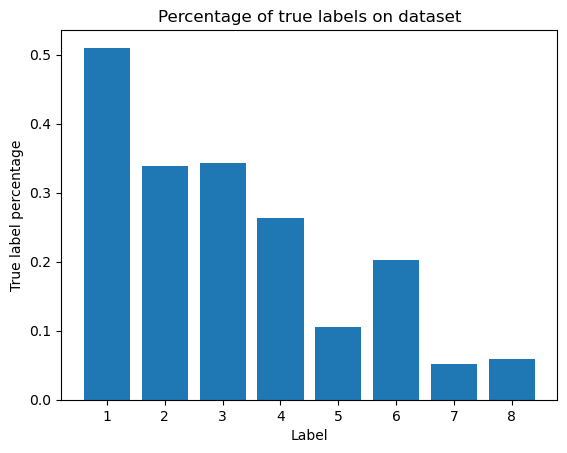

In [8]:
plt.bar(label, word_pct)
plt.title("Percentage of true labels on dataset")
plt.xlabel("Label")
plt.ylabel("True label percentage")
plt.show()

In [9]:
id_test = [ 427, 1676, 1383, 2392, 2071,  362, 1006, 1679,  544, 1859, 1725,
       2231, 2728,  332,  696, 2552, 1910,  824, 1423,  413,  975, 2096,
        549, 1233,  841, 2859, 2453, 2874,  550, 1896,  874, 1740, 2280,
        775, 1587,  793,  143, 2876, 1261, 2695, 1805, 1461, 2944, 1164,
        984,  849, 1634, 2708, 1878,  395,  510,  445, 2655,  965, 2946,
        832, 2219, 2198, 1140, 1486, 2909,  443,  620,  302, 2477, 1496,
       2566, 1621,  561, 1593, 1635, 2308, 2706, 1094,  199, 2916, 2524,
       2438, 1566,  599, 2353,  967,  796, 1835, 1337, 1963, 1817, 2836,
         32, 2482,   67, 2217, 1545, 1287, 1647, 2831, 1842, 2042,  304,
       2434,  980,  872, 1075,  326, 1494, 2298, 2568, 2619, 2448, 1471,
        316, 2683,  513, 2051, 1179, 2960, 2032, 2764,  201, 1352, 2366,
        897, 1907,  663,   30,  452, 1073, 2809,  585, 1660, 1331, 1639,
        182,  894, 1611, 1820, 2500, 2969, 2534, 1881, 2522, 2344,   73,
       1257,   63, 1701,  216,   45, 1452, 2301, 1230, 1518,   80, 2601,
       2844, 1153, 1021,  494, 2557, 1474, 1442,  420, 1681, 2651, 1533,
        713, 2799, 1557, 2243, 2362, 2903,  617, 1711, 1252, 1370,  628,
         44, 1469,  473, 1546, 2758, 2271,  446, 2875, 2865,  339,  423,
         93, 1536,  179,  801,  449, 1543, 1517,  470, 1421,  581,  862,
        534,  590, 2476, 2413,  522,  376, 2447, 2518,  244, 2412, 2886,
        463, 1892, 1777, 2107, 1816, 2416, 2327, 1246, 1234, 2797,  476,
        612,  560,  422,   70,  915, 2689,  501, 1145,   56, 1247, 1673,
       2098, 2869, 1491,  329,  102,  404, 2466, 1108,  500, 2664, 1814,
       2127, 1363, 2631, 2321, 2307,  126,  432, 2041,  545,  616, 1083,
       1935,  681, 2106,  750, 2160, 1666, 2444, 1137, 1736, 2281, 1703,
       1417, 2850,  238, 2312, 1825, 2840, 1136, 1318,  525, 1932,  904,
       1705, 2275, 1131, 2471, 1204, 2295, 2025, 2861, 1299, 1147, 2819,
       2250, 1291,   29, 2621,  880, 1268, 1090, 1631, 1784,  193,  173,
       1824,   43,   87, 2672,  865,  288, 2816, 2796,  661, 1005, 1283,
       2635, 2446,  151,  538, 1525]

In [10]:
df_train = df.loc[~df["id"].isin(id_test)]

In [11]:
df_test = df.loc[df["id"].isin(id_test)]

In [12]:
df_test.to_csv("./df_test.csv", index=False)

# Analysis by tag

In [13]:
def flatten_list(some_list):
    old_len = len(some_list)
    
    while old_len:
        some_list.extend(some_list[0])
        some_list.pop(0)
        old_len -= 1
        
    return some_list

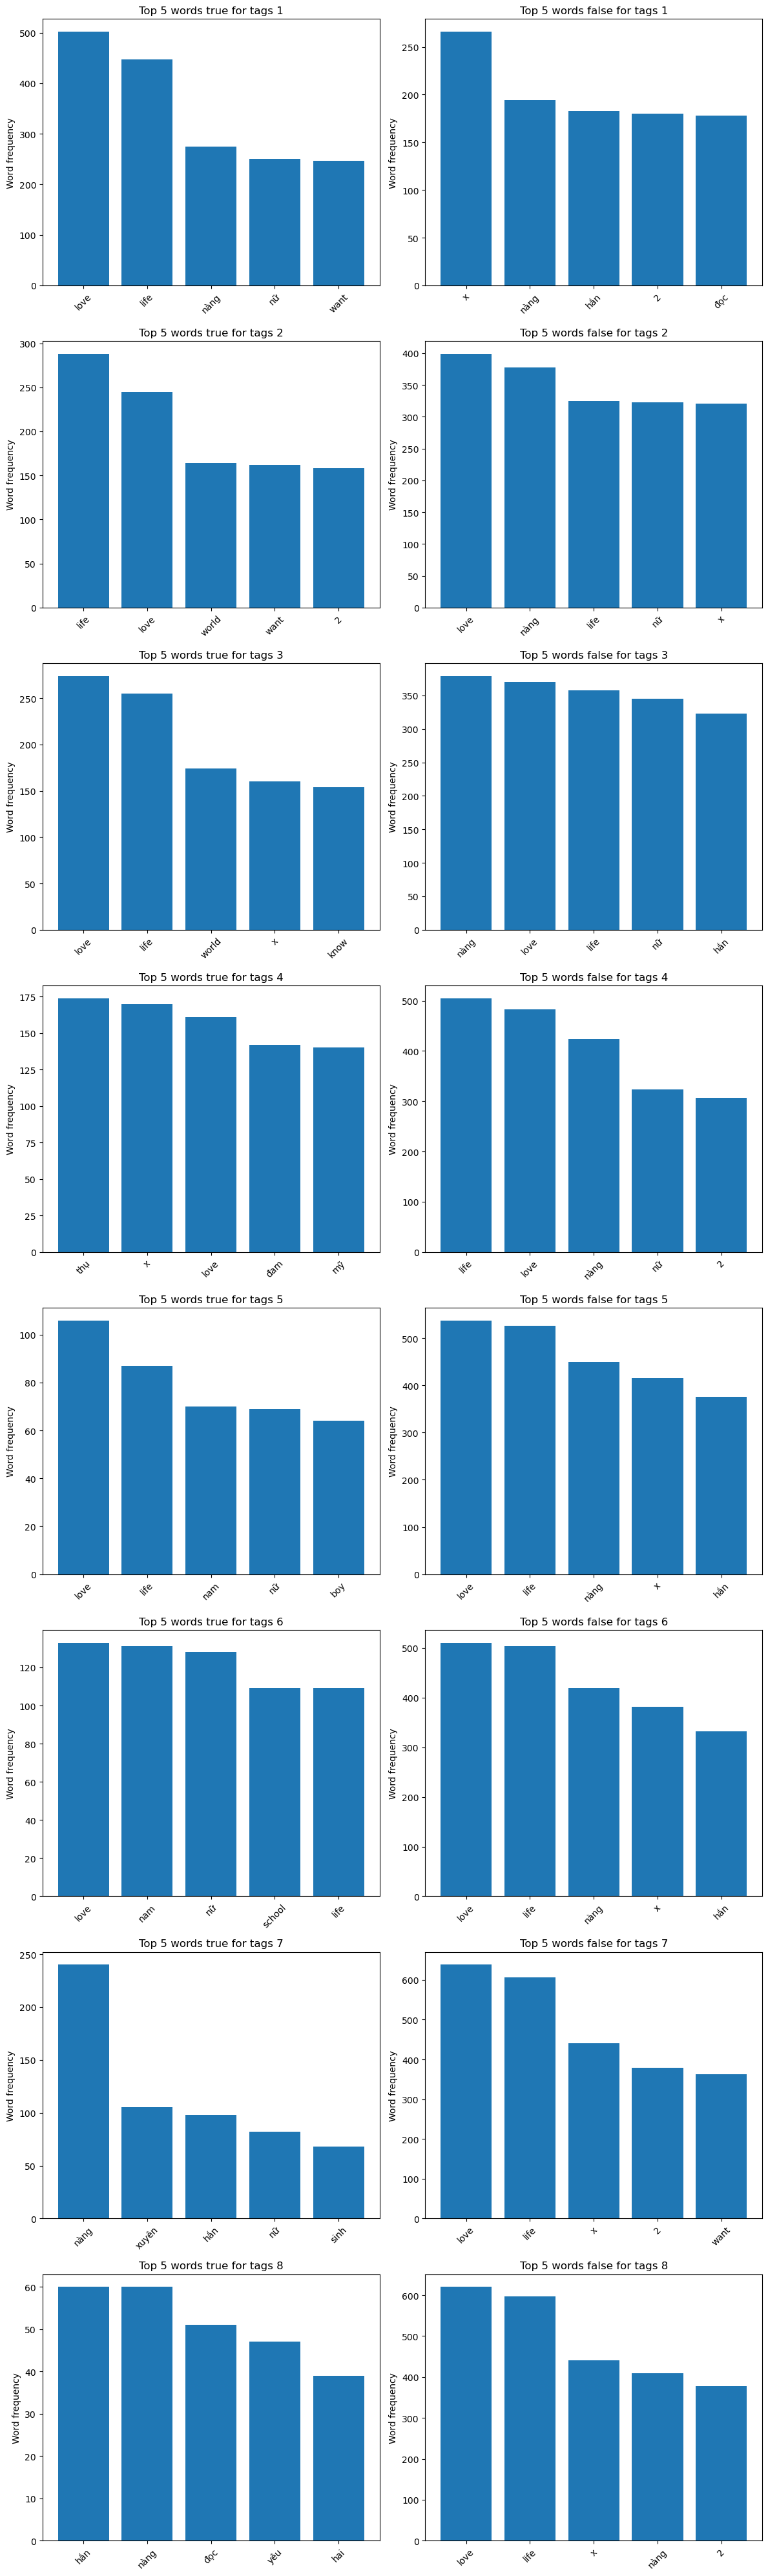

In [42]:
word_freq_true_all = {}
word_freq_false_all = {}

fig, axs = plt.subplots(8, 2, figsize=(12, 40))  # Creating subplots with 8 rows and 2 columns

for i in range(1, 9):
    df_true = df_train.loc[df_train[str(i)] == True]
    df_false = df_train.loc[df_train[str(i)] == False]
    
    word_true = flatten_list([j["text"].split(" ") for _, j in df_true.iterrows()])
    word_false = flatten_list([j["text"].split(" ") for _, j in df_false.iterrows()])
    
    word_freq_true = Counter(word_true)
    word_freq_false = Counter(word_false)
    
    word_freq_true_loc = {key: item for key, item in word_freq_true.most_common(5)}
    word_freq_false_loc = {key: item for key, item in word_freq_false.most_common(5)}
    
    ax = axs[i-1, 0]  # Selecting the left subplot in the ith row
    ax.bar(word_freq_true_loc.keys(), word_freq_true_loc.values())
    ax.set_title(f"Top 5 words true for tags {i}")
    ax.set_ylabel("Word frequency")
    ax.tick_params(axis='x', rotation=45)  # Rotating x-axis labels
    
    ax = axs[i-1, 1]  # Selecting the right subplot in the ith row
    ax.bar(word_freq_false_loc.keys(), word_freq_false_loc.values())
    ax.set_title(f"Top 5 words false for tags {i}")
    ax.set_ylabel("Word frequency")
    ax.tick_params(axis='x', rotation=45)  # Rotating x-axis labels

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()
